# Scikit-Optimize plot_evaluations

## Convert hyper parameter dataframe to a OptimizeResult format
Say you have your hyper parameter and metric stored in a dataframe.

In [12]:
hyper_df.head()

,ROC_AUC,lgbm__max_depth,lgbm__num_leaves,lgbm__min_child_samples
0,0.7578376974936794,20.0,50.0,20.0
1,0.7578376974936794,20.0,50.0,20.0
2,0.7578376974936794,20.0,50.0,20.0
3,0.7383150842338956,20.0,50.0,20.0
4,0.7859497222152486,-1.0,100.0,600.0


You can use `df2result` helper function from `neptunecontrib.hpo.utils`.

In [13]:
from neptunecontrib.hpo.utils import df2result

result = df2result(hyper_df, 
                   metric_col='ROC_AUC', 
                   param_cols=['lgbm__max_depth',
                               'lgbm__num_leaves',
                               'lgbm__min_child_samples'])
type(result), result.keys()

(scipy.optimize.optimize.OptimizeResult,
 dict_keys(['x_iters', 'func_vals', 'x', 'fun', 'space']))

## Use skopt.plots
Now you can use functions from `skopt.plots` with no problems.

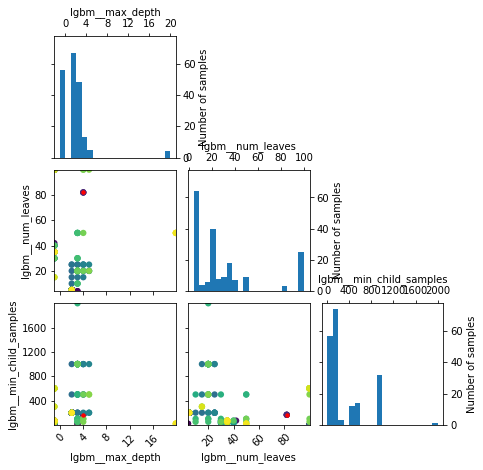

In [14]:
import matplotlib.pyplot as plt

from skopt.plots import plot_evaluations

eval_plot = plot_evaluations(result, bins=20)
eval_plot;

**Note**

This chart is actually in a pretty weird format. It's an array of `matplotlib.axes` objects.

You can convert it to the standard matplotlib Figure by using a helper function from `neptunecontrib.viz`.

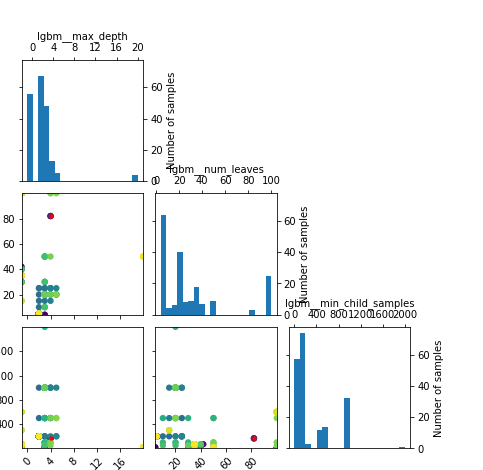

In [15]:
from neptunecontrib.viz.utils import axes2fig

fig = axes2fig(eval_plot)
type(fig);